In [2]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from numpy import savetxt
import seaborn as sns
import matplotlib.pyplot as plt
import torch


2024-02-08 13:22:11.768960: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
torch.cuda.device(0)

Load Data

In [3]:
data_df = pd.read_csv("master_thesis_code/Data/Dataset/Trainingdata/data_coded.csv")
data_df.head()


,ID,text,label
0,1244077735000029674,Die Briten lieben ihre Sklavenhaltung? 👉Es ist...,0
1,128100127700004237,"💥👍Politiker weigerte sich, im italienischen Se...",0
2,791000014168,Dem stimme ich in vielen Teilen zu: 🇩🇪 🇦🇹 🇨🇭 ...,1
3,1451422766000068840,Andreas Kalcker - Wie lange kommst Du ohne Sau...,0
4,69000078620,**Das Muster dieses CORONA-Impfskandals ist al...,1


In [4]:
len(data_df)

7824

In [5]:
selected_columns = ['text', 'label']
df = data_df[selected_columns]
df = df.rename(columns={'label': 'labels'})

df.head()



,text,labels
0,Die Briten lieben ihre Sklavenhaltung? 👉Es ist...,0
1,"💥👍Politiker weigerte sich, im italienischen Se...",0
2,Dem stimme ich in vielen Teilen zu: 🇩🇪 🇦🇹 🇨🇭 ...,1
3,Andreas Kalcker - Wie lange kommst Du ohne Sau...,0
4,**Das Muster dieses CORONA-Impfskandals ist al...,1


Model Training

In [20]:
seed = 1312
n=5
kf = KFold(n_splits=n, random_state=seed, shuffle=True)


In [21]:
# model arguments
model_args = ClassificationArgs(num_train_epochs=3, overwrite_output_dir =  True, use_multiprocessing=False, use_multiprocessing_for_evaluation=False)

# evaluation metrics
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='macro')

def f1_neg(labels, preds):
    return f1_score(labels, preds, pos_label=0)

def recall_multiclass(labels, preds):
    return recall_score(labels, preds, average='macro')

def recall_neg(labels, preds):
    return recall_score(labels, preds, pos_label=0)

def precision_multiclass(labels, preds):
    return precision_score(labels, preds, average='macro')

def precision_neg(labels, preds):
    return precision_score(labels, preds, pos_label=0)

5-Fold Crossvalidation

In [34]:
results = []
for i, (train_index, val_index) in enumerate(kf.split(df)):
    #split train/val
    print(f"Fold # {i}")
    train_df = df.iloc[train_index]
    val_df = df.iloc[val_index]

    print("Torch?:", torch.cuda.is_available())
    #os.environ["TOKENIZERS_PARALLELISM"] = "false"
    # os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

    # define model
    model = ClassificationModel(
        'distilbert',
        'ml6team/distilbert-base-german-cased-toxic-comments',
         use_cuda=True,
         args=model_args
    )

    print("Model loaded, start training")
    

    # training
    model.train_model(train_df)

    print("Start evaluation")
    result, model_outputs, wrong_predictions = model.eval_model(val_df, f1_pos=f1_score, f1_neg=f1_neg, f1_macro=f1_multiclass,
                                                                recall_pos=recall_score, recall_neg=recall_neg, recall_macro=recall_multiclass, 
                                                                precision_pos = precision_score, precision_neg=precision_neg, precision_macro=precision_multiclass,
                                                                acc=accuracy_score)
    print(result)
    results.append(result)




Fold # 0
Torch?: True
Model loaded, start training


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Start evaluation


Running Evaluation:   0%|          | 0/196 [00:00<?, ?it/s]

{'mcc': 0.6669553531213723, 'tp': 194, 'tn': 1220, 'fp': 49, 'fn': 102, 'auroc': 0.937726290119907, 'auprc': 0.831936459083556, 'f1_pos': 0.719851576994434, 'f1_neg': 0.941721343110768, 'f1_macro': 0.830786460052601, 'recall_pos': 0.6554054054054054, 'recall_neg': 0.9613869188337274, 'recall_macro': 0.8083961621195663, 'precision_pos': 0.7983539094650206, 'precision_neg': 0.9228441754916793, 'precision_macro': 0.86059904247835, 'acc': 0.9035143769968051, 'eval_loss': 0.4914804969971277}
Fold # 1
Torch?: True
Model loaded, start training


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Start evaluation


Running Evaluation:   0%|          | 0/196 [00:00<?, ?it/s]

{'mcc': 0.6634937763018505, 'tp': 193, 'tn': 1221, 'fp': 56, 'fn': 95, 'auroc': 0.9464239102062124, 'auprc': 0.840529489344575, 'f1_pos': 0.718808193668529, 'f1_neg': 0.9417662938681065, 'f1_macro': 0.8302872437683178, 'recall_pos': 0.6701388888888888, 'recall_neg': 0.9561472200469852, 'recall_macro': 0.813143054467937, 'precision_pos': 0.7751004016064257, 'precision_neg': 0.9278115501519757, 'precision_macro': 0.8514559758792006, 'acc': 0.9035143769968051, 'eval_loss': 0.44583618929799723}
Fold # 2
Torch?: True
Model loaded, start training


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Start evaluation


Running Evaluation:   0%|          | 0/196 [00:00<?, ?it/s]

{'mcc': 0.6559361739675673, 'tp': 190, 'tn': 1220, 'fp': 51, 'fn': 104, 'auroc': 0.920022533010057, 'auprc': 0.809389185087918, 'f1_pos': 0.7102803738317758, 'f1_neg': 0.9402697495183043, 'f1_macro': 0.8252750616750401, 'recall_pos': 0.6462585034013606, 'recall_neg': 0.9598741148701809, 'recall_macro': 0.8030663091357708, 'precision_pos': 0.7883817427385892, 'precision_neg': 0.9214501510574018, 'precision_macro': 0.8549159468979954, 'acc': 0.9009584664536742, 'eval_loss': 0.5220364402903586}
Fold # 3
Torch?: True
Model loaded, start training


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Start evaluation


Running Evaluation:   0%|          | 0/196 [00:00<?, ?it/s]

{'mcc': 0.6459652424539656, 'tp': 185, 'tn': 1225, 'fp': 68, 'fn': 87, 'auroc': 0.9125949683817842, 'auprc': 0.7447645883621173, 'f1_pos': 0.7047619047619048, 'f1_neg': 0.9404990403071017, 'f1_macro': 0.8226304725345033, 'recall_pos': 0.6801470588235294, 'recall_neg': 0.9474091260634184, 'recall_macro': 0.8137780924434739, 'precision_pos': 0.7312252964426877, 'precision_neg': 0.9336890243902439, 'precision_macro': 0.8324571604164659, 'acc': 0.9009584664536742, 'eval_loss': 0.539412755367099}
Fold # 4
Torch?: True
Model loaded, start training


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/783 [00:00<?, ?it/s]

Start evaluation


Running Evaluation:   0%|          | 0/196 [00:00<?, ?it/s]

{'mcc': 0.6949526214908761, 'tp': 214, 'tn': 1207, 'fp': 58, 'fn': 85, 'auroc': 0.9307758404166722, 'auprc': 0.8319155599595114, 'f1_pos': 0.7495621716287215, 'f1_neg': 0.9440750879937426, 'f1_macro': 0.8468186298112321, 'recall_pos': 0.7157190635451505, 'recall_neg': 0.9541501976284585, 'recall_macro': 0.8349346305868045, 'precision_pos': 0.7867647058823529, 'precision_neg': 0.9342105263157895, 'precision_macro': 0.8604876160990712, 'acc': 0.9085677749360613, 'eval_loss': 0.4633360112047925}


In [35]:
# save results
df_results = pd.DataFrame(results)
df_results.head()


,mcc,tp,tn,fp,fn,auroc,auprc,f1_pos,f1_neg,f1_macro,recall_pos,recall_neg,recall_macro,precision_pos,precision_neg,precision_macro,acc,eval_loss
0,0.666955,194,1220,49,102,0.937726,0.831936,0.719852,0.941721,0.830786,0.655405,0.961387,0.808396,0.798354,0.922844,0.860599,0.903514,0.491480
1,0.663494,193,1221,56,95,0.946424,0.840529,0.718808,0.941766,0.830287,0.670139,0.956147,0.813143,0.775100,0.927812,0.851456,0.903514,0.445836
2,0.655936,190,1220,51,104,0.920023,0.809389,0.710280,0.940270,0.825275,0.646259,0.959874,0.803066,0.788382,0.921450,0.854916,0.900958,0.522036
3,0.645965,185,1225,68,87,0.912595,0.744765,0.704762,0.940499,0.822630,0.680147,0.947409,0.813778,0.731225,0.933689,0.832457,0.900958,0.539413
4,0.694953,214,1207,58,85,0.930776,0.831916,0.749562,0.944075,0.846819,0.715719,0.954150,0.834935,0.786765,0.934211,0.860488,0.908568,0.463336


In [36]:
df_results.to_csv("master_thesis_code/Data/Dataset/Trainingdata/results.csv")

In [4]:
df_results = pd.read_csv("master_thesis_code/Data/Dataset/Trainingdata/results.csv")
df_results.head()

,Unnamed: 0,mcc,tp,tn,fp,fn,auroc,auprc,f1_pos,f1_neg,f1_macro,recall_pos,recall_neg,recall_macro,precision_pos,precision_neg,precision_macro,acc,eval_loss
0,0,0.666955,194,1220,49,102,0.937726,0.831936,0.719852,0.941721,0.830786,0.655405,0.961387,0.808396,0.798354,0.922844,0.860599,0.903514,0.491480
1,1,0.663494,193,1221,56,95,0.946424,0.840529,0.718808,0.941766,0.830287,0.670139,0.956147,0.813143,0.775100,0.927812,0.851456,0.903514,0.445836
2,2,0.655936,190,1220,51,104,0.920023,0.809389,0.710280,0.940270,0.825275,0.646259,0.959874,0.803066,0.788382,0.921450,0.854916,0.900958,0.522036
3,3,0.645965,185,1225,68,87,0.912595,0.744765,0.704762,0.940499,0.822630,0.680147,0.947409,0.813778,0.731225,0.933689,0.832457,0.900958,0.539413
4,4,0.694953,214,1207,58,85,0.930776,0.831916,0.749562,0.944075,0.846819,0.715719,0.954150,0.834935,0.786765,0.934211,0.860488,0.908568,0.463336


In [5]:
# create mean confusion matrix
conf_matrix = np.array([[df_results["tn"].mean(), df_results["fp"].mean()],
                        [df_results["fn"].mean(), df_results["tp"].mean()]])


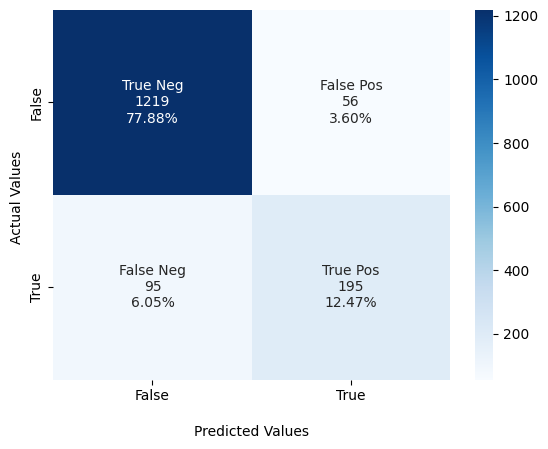

In [34]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
#ax.set_title('Confusion Matrix - 5-fold Cross-Validation\n \n Mean over 5 Runs', fontsize = 10);
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


plt.savefig('confusion.pdf', bbox_inches='tight')





Prediction

In [33]:
# full model for prediction
model_args = ClassificationArgs(num_train_epochs=3, overwrite_output_dir =  True, use_multiprocessing=False, use_multiprocessing_for_evaluation=False)
model = ClassificationModel(
        'distilbert',
        'ml6team/distilbert-base-german-cased-toxic-comments',
         use_cuda=True,
         args=model_args
        )

model.train_model(df)


NameError: name 'df' is not defined

In [ ]:
# load full dataset
full_df = pd.read_csv("master_thesis_code/Data/Dataset/data_wNA_wL.csv", usecols=["new_id", "raw_text"])
full_df.head()


In [ ]:
predictions, raw_outputs = model.predict(full_df["raw_text"])

In [ ]:
small_df = full_df.head(1000)

In [ ]:
len(small_df)

In [ ]:
predictions, raw_outputs = model.predict(small_df["raw_text"].tolist())

In [ ]:
small_df["predictions"] =  predictions
small_df.head()

In [ ]:
batch_size = 500000

predictions_list = []
raw_outputs_list = []


for i in range(0, len(full_df), batch_size):
    batch_df = full_df.iloc[i:i + batch_size]  
    
    predictions, raw_outputs = model.predict(batch_df["raw_text"].tolist())
    
    predictions_list.extend(predictions)
    raw_outputs_list.extend(raw_outputs)

# Add the predictions and raw outputs as new columns to the original DataFrame
full_df['predictions'] = predictions_list
full_df.head()

In [ ]:
full_df["new_id"].head()

In [ ]:
full_df.to_csv("predictions.csv")

In [ ]:
full_df["predictions"] = predictions